In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

# MNIST

A base de dados que utilizaremos é conhecida como MNIST ("Modified National Institute of Standards and Technology"), e deriva de uma base maior que foi construida pela NIST nos Estados Unidos (o equivalente da nossa ABNT). Esta base de dados é considerada o verdadeiro "Hello, world!" de métodos de classificação. Em http://yann.lecun.com/exdb/mnist/ temos uma descrição mais detalhada desta base de dados.

**Atividade**: 
    
Leia a página de descrição do MNIST supracitada, e responda:

- Quantas imagens de treinamento e quantas imagens de teste existem na MNIST?

- Qual o tamanho de cada imagem no MNIST?

- Os criadores da MNIST tiveram um cuidado especial ao construir os conjuntos de treinamento e teste, em relação às pessoas que escreveram os dígitos. Que cuidado foi esse, e por que foi adotado?

- As imagens foram construidas escaneando digitos manuscritos, que foram escritos por dois grupos de pessoas: alunos de colegial (SD-1) e funcionários da NIST (SD-3). Originalmente a NIST designou SD-3 como o conjunto de teste, e SD-1 como o conjunto de treinamento. Os criadores da MNIST criticaram essa decisão e resolveram misturar os conjuntos. Por que? Como esta situação difere daquela da pergunta anterior?

- A página lista vários artigos que exploraram métodos de classificação no MNIST, com seus respectivos desempenhos. Qual o método com o pior desempenho (e qual foi esse desempenho)? Qual o método com o melhor desempenho, e de quanto foi?

---

**R:**

- Quantas imagens de treinamento e quantas imagens de teste existem na MNIST?

De acordo com o site:

    The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
    
Portanto, 60000 imagens de treinamento e 10000 imagens de teste.

- Qual o tamanho de cada imagem no MNIST?

De acordo com o site:

    The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.
    
Portanto as imagens são de tabanho $28 \times 28$ pixels. Interessante notar que o centro de massa de cada imagem foi posicionado no centro deste campo de $28 \times 28$ pixels.

- Os criadores da MNIST tiveram um cuidado especial ao construir os conjuntos de treinamento e teste, em relação às pessoas que escreveram os dígitos. Que cuidado foi esse, e por que foi adotado?

Tomou-se o cuidado de separar as pessoas: se os digitos escritos por uma pessoa estão no conjunto de imagens de treinamento, então dígitos escritos por essa pessoa não podem aparecer no conjunto de teste, e vice-versa. A lógica que leva a essa medida é considerar que um classificador de dígitos deve ser apto a identificar dígitos manuscritos de uma pessoa que nunca foi vista na fase de treinamento.

- As imagens foram construidas escaneando digitos manuscritos, que foram escritos por dois grupos de pessoas: alunos de colegial (SD-1) e funcionários da NIST (SD-3). Originalmente a NIST designou SD-3 como o conjunto de teste, e SD-1 como o conjunto de treinamento. Os criadores da MNIST criticaram essa decisão e resolveram misturar os conjuntos. Por que? Como esta situação difere daquela da pergunta anterior?

Os criadores da base MNIST resolveram misturar as pessoas dos grupos SD-1 e SD-3. Isto é necessário para garantir que o classificador é efetivo para dígitos escritos por pessoas de ambos os grupos. Caso essa mistura não fosse realizada correríamos o risco de ter um classificador que só é efetivo para reconhecer a caligrafia de alunos do colegial, o que é um erro de projeto. 

A situação atual difere da anterior: a medida tomada na questão anterior dizia respeito a verificar o comportamento do classificador para uma nova pessoa, mas de uma categoria de pessoas já conhecida. A medida atual diz respeito a testar o desempenho do classificador para grupos conhecidos de pessoas, sem viés sistêmico do *dataset* de treinamento.

- A página lista vários artigos que exploraram métodos de classificação no MNIST, com seus respectivos desempenhos. Qual o método com o pior desempenho (e qual foi esse desempenho)? Qual o método com o melhor desempenho, e de quanto foi?

O método de melhor desempenho dentre as técnicas elencadas é o método do *technical report* "Multi-column Deep Neural Networks for Image Classification" de Dan Cireşan, Ueli Meier e Juergen Schmidhuber.


A técnica aplicada é descrita como "committee of 35 conv. net, 1-20-P-40-P-150-10 [elastic distortions]", usando pré-processamento "width normalization" resultando em uma taxa de erro de classificação no conjunto de treinamento de $0,23 \%$ (ou seja, uma acurácia de $99,77 \%$).

---

O scikit-learn já tem ferramentas para baixar e disponibilizar alguns dos datasets mais comuns da comunidade de machine learning:

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

# A função fetch_openml() returns targets as strings, precisamos converter para
# valores numéricos.
mnist.target = mnist.target.astype(np.int8)

mnist["data"], mnist["target"]

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
        pixel1

No campo `data` temos as várias imagens de dígitos manuscritos. Cada item é uma lista de $28^2 = 784$ valores.

No campo `target` temos o rótulo de cada uma dessas imagens.

In [3]:
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Vamos ver um desses dígitos manuscritos para checar se a leitura de dados funcionou:

label: 5


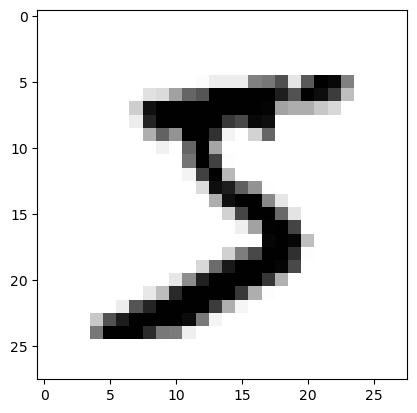

In [4]:
some_digit = X[0]
some_digit_label = y[0]

print(f'label: {some_digit_label}')

some_digit_image = some_digit.reshape(28, 28)  # Por que? Explique!

plt.figure()
plt.imshow(
    some_digit_image,
    cmap=matplotlib.cm.binary,
    interpolation='nearest',
)
plt.show()

Parece que deu certo: pela imagem trata-se de um dígito $5$ manuscrito, e de fato o rótulo confirma essa observação.

# Separando treinamento e teste

Conforme visto na descrição do dataset MNIST, a separação entre conjunto de treinamento e teste já está feita. Neste caso, não devemos fazer a separação dos dados conforme visto na aula passada. 

In [5]:
unique, counts = np.unique(mnist['target'][:60000], return_counts=True)
for u, c in zip(unique, counts):
    print(f'{u}: {c}')

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


Os primeiros 60000 exemplos são o conjunto de treinamento, e estão organizados por dígito. Os últimos 10000 exemplos são o conjunto de teste, e também estão organizados por dígito.

In [6]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

Vamos ver mais alguns digitos desta base:

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


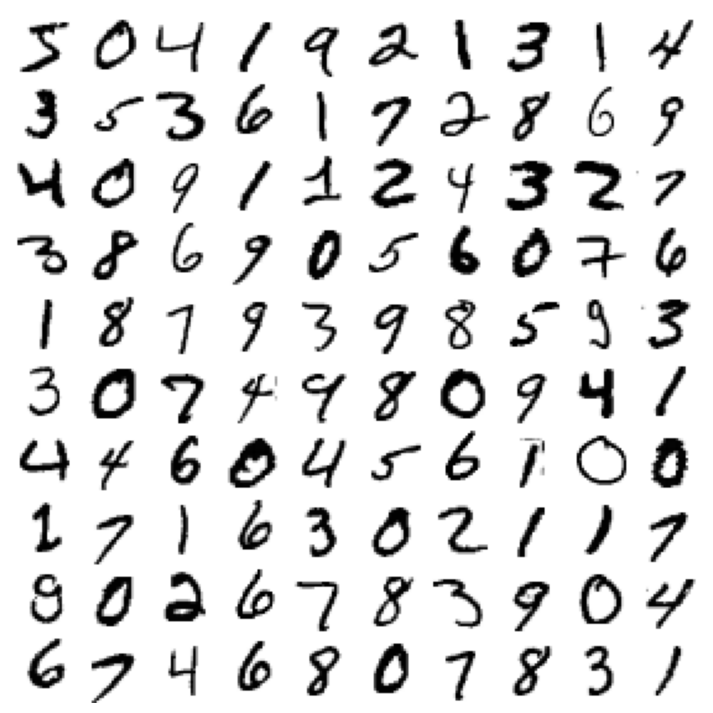

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    """Plota uma lista de imagens do MNIST em um formato de matriz de imagens.
    
    Args:
        instances: Lista de linhas da matriz de amostras do MNIST.
        images_per_row: Número de imagens por linha.
        options: Opções passadas ao comando plt.imshow() para desenho.
    """
    # Tamanho das imagens no MNIST: 28 x 28.
    size = 28

    # Monta uma lista de imagens usando list comprehension e np.reshape().
    # Cada item da lista resultante é uma imagem 28 x 28.
    images = [instance.reshape(size, size) for instance in instances]

    # Caso o número de imagens por linha seja muito grande,
    # limite no número de imagens disponível.
    images_per_row = min(len(instances), images_per_row)

    # Dado o número de imagens por linha, calcule quantas linhas
    # são necessárias.
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Truque: cria uma imagem em branco de tamanho suficiente para preencher
    # o espaço em branco no final da ultima linha, e coloca essa imagem
    # em branco na lista de imagens.
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))

    # Cria uma imagem unificada por linha.
    row_images = []
    for row in range(n_rows):
        # Junta imagens da linha em uma imagem unificada, e coloca na
        # lista de imagens de linha.
        rimages = images[row * images_per_row:(row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))

    # Junta todas as imagens de linha em uma unica imagem final.
    image = np.concatenate(row_images, axis=0)

    # Mostra a imagem final.
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")


example_labels = y[:100]
example_images = X[:100]

print(example_labels)

plt.figure(figsize=(9, 9))
plot_digits(example_images, images_per_row=10)
plt.show()

# Classificação binária

Vamos começar com um problema mais simples: classificar os dígitos da base em 'cincos' e 'não-cincos'. Este é um problema de classificação binária. Por mera convenção, chamaremos de 'amostras positivas', ou simplemente 'positivos' os digitos $5$ e de 'negativos' os demais dígitos.

Vamos adaptar os conjuntos de treinamento e teste ao nosso cenário:

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Verificando se funcionou:

In [9]:
n = 20
for original, binarized in zip(y_train[:n], y_train_5[:n]):
    print(f'{original} -> {binarized}')

5 -> True
0 -> False
4 -> False
1 -> False
9 -> False
2 -> False
1 -> False
3 -> False
1 -> False
4 -> False
3 -> False
5 -> True
3 -> False
6 -> False
1 -> False
7 -> False
2 -> False
8 -> False
6 -> False
9 -> False


Vamos agora treinar um classificador sobre todo o conjunto de treinamento, como fizemos na aula sobre regressão. Vamos usar um classificador chamado de *Stochastic Gradient Descent*, que é uma generalização de alguns tipos diferentes de classificadores mais tradicionais. O scikit-learn tem uma classe que implementa este classificador: `SGDClassifier`. Com os parâmetros default desta classe, o classificador SGD é equivalente a um classificador do tipo "máquina de vetores de suporte linear".

In [10]:
from sklearn.linear_model import SGDClassifier

# Existe aleatoriedade dentro do SGDClassifier, por isso o argumento
# random_state=RANDOM_SEED.
sgd_clf = SGDClassifier(
    max_iter=500,
    tol=1e-3,
    random_state=RANDOM_SEED,
)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=500, random_state=42)

Vamos testar o classificador naquele dígito $5$ que a gente tinha visualizado no começo do notebook:

In [11]:
# Observe que a amostra "some_digit" é apenas uma lista de valores de pixel.
# O comando predict requer uma matriz ou uma lista de listas, onde cada linha é
# uma amostra a ser classificada (mesmo que seja uma amostra só!). Portanto,
# temos que colocar "some_digit" numa lista.
sgd_clf.predict([some_digit])

array([ True])

Perfeito, ele acertou! Mas isso foi apenas um exemplo, vamos agora estudar o desempenho do classificador.

# Métricas de desempenho

## Usando validação cruzada

Assim como na aula anterior, podemos usar a estratégia da validação cruzada para tentar inferir o desempenho do nosso classificador no mundo real:

In [12]:
import time
from sklearn.model_selection import cross_val_score

t1 = time.process_time()
res = cross_val_score(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)
t2 = time.process_time()

print('Elapsed time: {}'.format(t2 - t1))
print(res)

Elapsed time: 0.703125
[0.95035 0.96035 0.9604 ]


A medida usada é o *accuracy* (acurácia), que é a porcentagem de acertos de previsão. Obtivemos 96%! Parece excelente, mas será mesmo? Compare com o "classificador" a seguir:

In [13]:
from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):

    def fit(self, X, y=None):
        # Nada a ser feito no treinamento.
        pass

    def predict(self, X):
        # Recebe len(X) amostras, chuta "False" como resposta para todas!
        return [False] * len(X)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(
    never_5_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

array([0.91125, 0.90855, 0.90915])

**Pergunta:** Parece que atingir 90% não é nada difícil neste problema... na verdade, é o esperado! Explique porque.

**R:**

Em um dataset de dígitos ao acaso, esperamos que $90\%$ destes não sejam o dígito $5$. Se nosso classificador simplesmente "chuta" que um dígito qualquer não é o dígito $5$, vai acertar em $90 \%$ dos casos. 

Com isso podemos ver que em qualquer problema de classificação é importante conhecer a distribuição das classes, pois sempre podemos construir um classificador trivial que responde à qualquer consulta com a classe mais frequente do dataset. Tal classificador trivial terá uma acurácia média equivalente à frequência relativa da classe mais provável. 

## Matriz de confusão

Uma forma muito interessante de se avaliar o desempenho de um classificador é obter a matriz de confusão (*confusion matrix*) do classificador. Nesta matriz cada linha representa a categoria *verdadeira* de um objeto, e cada coluna representa a categoria *predita* de um objeto. Uma posição $(r,c)$ da matriz de confusão representa, portanto, o número de objetos que pertencem verdadeiramente à categoria $r$, mas que foram classificados como pertencentes à categoria $c$ por nosso classificador. 

<center>
<img src="confusao.png" alt="Matriz de confusão">
</center>

As células da diagonal, em azul, mostram as posições onde a classe verdadeira e a classe predita coincidem, esses são os acertos. As células fora da diagonal, em vermelho, são os erros.

Podemos calcular a matriz de confusão resultante do treinamento sobre o conjunto (de treinamento) completo:

In [15]:
from sklearn.metrics import confusion_matrix

sgd_clf.fit(X_train, y_train_5)
y_train_pred = sgd_clf.predict(X_train)
mat = confusion_matrix(y_train_5, y_train_pred)
mat

array([[52316,  2263],
       [  601,  4820]])

Porém o desempenho exibido por este processo é muito otimista, e não representa uma estimativa realista dos erros deste classificador no mundo real.

**Pergunta:** Em caso de overfitting total, como ficaria a matriz de confusão?

**R:** diagonal

Uma idéia melhor é aplicar o conceito de validação cruzada para realizar a predição de cada amostra. Funciona assim:

- Particionamos os dados em N partições.

- Para cada partição:

    - Treinamos o classificador sobre os dados das outras partições
    
    - Usamos o classificador para prever as classes das amostras desta partição

Por exemplo: suponha que temos 3 partições. As categorias preditas dos objetos da primeira partição são obtidas da seguinte forma:

- Treinamos o classificador usando os dados das partições 2 e 3

- Aplicamos o classificador para os objetos da partição 1. Guardamos estes resultados

Fazemos o mesmo para os objetos das partições 2 e 3. Desta forma, cada objeto foi predito de modo "honesto", ou seja, usando um classificador que não continha o próprio objeto como dado de treinamento!

O scikit-learn já tem uma função para fazer exatamente isso: `cross_val_predict`

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)

Agora podemos observar uma matriz de confusão mais realista:

In [17]:
mat = confusion_matrix(y_train_5, y_train_pred)
mat

array([[53892,   687],
       [ 1891,  3530]])

Não mudou muito, mas tudo bem: esses números são mais confiáveis. Significa que nosso modelo não é muito inclinado a ter overfitting nesse problema em particular!

Nesta matriz de confusão a primeira linha indica dígitos "não-cinco", e a segunda linha indica os dígitos "cinco". Em problemas de classificação binária usamos a terminologia "negativos" (os "não-cinco") e "positivos" (os "cinco"), e dizemos também que nosso problema é "detectar" os dígitos "cinco".

- **TP**: Os valores **verdadeiramente positivos** e que foram **preditos como positivos** são os **true positives** (verdadeiros positivos).

- **FN**: Os valores **verdadeiramente positivos** e que foram **preditos como negativos** são os **false negatives** (falsos negativos, pois foram errôneamente classificados como negativos).

- **TN**: Os valores **verdadeiramente negativos** e que foram **preditos como negativos** são os **true negatives** (verdadeiros negativos).

- **FP**: os valores **verdadeiramente negativos** e que foram **preditos como positivos** são os **false positives** (falsos positivos, pois foram errôneamente classificados como positivos).

![Precision-recall](precision_recall.png "Precision and recall")

**Perguntas:**

- Dê um exemplo real de falso positivo.

- Dê um exemplo real de falso negativo.

- Nesta matriz exemplo, qual é a acurácia?

---

**R:**
- Dê um exemplo real de falso positivo.

- Dê um exemplo real de falso negativo.


Considere a seguinte situação: você quer contratar um novo engenheiro, e para tanto vai entrevistar um conjunto de candidatos. Você quer achar um engenheiro que conheça bem *machine learning*. No dia das entrevistas você teve um problema e não pode ir entrevistar os candidatos: no seu lugar foi um colega da equipe que não conhece tanto assim sobre *machine learning*. E agora?

Seu colega é como um classificador ruim. Ele pode acabar achando que um candidato é excelente (positivo) quando na verdade ele é ruim (portanto, falso positivo) - por exemplo, as perguntas feitas não tinham muito a ver com *machine learning*, e o candidato acabou se saindo bem. Por outro lado, o entrevistador pode acabar rejeitando (negativo) um candidato muito bom (portanto, falso negativo) porque as perguntas acabaram não sendo efetivas para detectar a competência do candidato no assunto central.

É por isso que os processos seletivos concorridos geralmente são organizados da seguinte forma:

- Fase inicial: seleção de currículos. Faz-se uma seleção abrangente, com um critério relaxado de aceitação (alto *recall*, baixo *precision* - ver abaixo) para capturar a maioria dos candidatos interessantes, mas deixando algum excesso de candidatos ruins. Nesta fase não precisamos de grande acurácia, e esta fase tende a ser conduzida pelo departamento de recursos humanos.

- Entrevistas preliminares. Geralmente temos alguns rounds de entrevistas telefônicas rápidas, feita por engenheiros do time. Nestas entrevistas temos um aumento de *precision* mantendo um bom *recall*, mas o custo do processo é mais alto - precisa envolver tempo de engenheiros.

- Entrevistas on site. Nesta fase os candidatos são convidados para entrevistas face-a-face com os engenheiros mais seniores. Trata-se de uma fase de alto custo: além do tempo requerido de membros seniores da equipe, muitas vezes os custos de deslocamento e estadia dos candidatos é pago pela própria empresa. A razão pela qual esta etapa é tão custosa é que o preço de um erro aqui é alto: 

    - Falso positivo: contrata-se um engenheiro que se mostra ineficiente no trabalho cotidiano. Neste caso existem custos associados ao treinamento do funcionário, custos de oportunidade por não ter contratado alguém melhor e pelo tempo e recursos gastos com a ineficiência deste funcionário, e custos de demissão.
    
    - Falso negativo: custo de oportunidade de não ter contratado alguém bom, e também o fato de que este candidato estará disponível para contratação pelos competidores.

- Nesta matriz exemplo, qual é a acurácia?

Temos um total de $8$ acertos ($5$ true negatives e $3$ true positives) de um total de $11$ amostras, logo a acurácia é $8 / 11 \approx 72,7 \%$

## Precision e recall

A medida de acurácia não permite distinguir entre os tipos de erro. Duas medidas mais comuns que são empregadas em machine learning são a **precision** (precisão) e **recall** (revocação), definidas como:

- Precision: Dentre os elementos classificados como positivos, quantos realmente são positivos?

$$\text{precision} = \frac{TP}{TP + FP}$$

- Recall: Dentre os elementos verdadeiramente positivos, quantos foram detectados como positivos?

$$\text{recall} = \frac{TP}{TP + FN}$$

**Perguntas:** 

- É sempre possível construir um classificador com recall 100%. Como? E o que acontece com o precision?

- Qual o precision e o recall do Never5Classifier?

---

**R:**

- É sempre possível construir um classificador com recall 100%. Como? E o que acontece com o precision?

Basta categorizar todas as amostras como positivas - nunca teremos um *false negative* posto que nunca teremos um *negative*! Ou seja:

- $FN = 0$ pois não teremos negativos

- $TP = P$, o número completo de positivos reais da base, pois todos estes serão categorizados como positivos.

Neste caso teremos 

$$
\text{recall} = \frac{TP}{TP + FN} = \frac{P}{P} = 1
$$

Neste caso o *precision* será afetado pelo alto número de *false positives*, pois todos os negativos serão classificados como positivos. Ou seja: $FP = N$. O *precision* então será:

$$
\text{precision} = \frac{TP}{TP + FP} = \frac{P}{P + N}
$$

Em palavras: quando o *recall* é $100 \%$, o *precision* é a fração de amostras positivas da base de dados.

- Qual o precision e o recall do Never5Classifier?

Neste caso o recall será zero, pois:

- $TP = 0$ já que nenhuma amostra será categorizada como positiva

- $FN = P$ pois todas as amostras verdadeiramente positivas serão classificadas como negativas

Consequentemente:

$$
\text{recall} = \frac{TP}{TP + FN} = \frac{0}{0 + P} = 0
$$

E como fica o *precision*? Na situação presente temos $FP = 0$ pois não teremos nenhuma amostra classificada como positiva, logo nenhuma amostra negativa será erroneamente classificada como positiva. O *precision* fica então:

$$
\text{precision} = \frac{TP}{TP + FP} = \frac{0}{0 + 0} = \text{indefinido}
$$

Contudo, podemos imaginar que o ``Never5Classifier`` é o caso limite de um classificador que quase nunca classifica uma amostra como positiva, a não ser que seja o $5$ mais ideal do universo (um ``AlmostNever5Classifier``). Suponha que nosso conjunto de teste é grande o suficiente para que tenhamos a presença de algumas cópias do $5$ ideal resultando em um $TP \neq 0$, mas que $FP$ continue sendo zero. Neste caso:

$$
\text{precision} = \frac{TP}{TP + FP} = \frac{TP}{TP + 0} = 1
$$

Portanto o ``AlmostNever5Classifier`` tem *recall* zero e *precision* $100 \%$.

---

Para calcular o precision e o recall no scikit-learn:

In [18]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


**Atividade:** Confirme se o scikit-learn acertou baseado na matriz de confusão.

A matriz de confusão era:

$$
\left[
\begin{matrix}
53892 & 687 \\
1891 & 3530
\end{matrix}
\right]
$$

Ou seja:

- $TP = 3530$
- $FP = 687$
- $TN = 53892$
- $FN = 1891$

O *precision* será:

$$
\text{precision} = \frac{TP}{TP + FP} = \frac{3530}{3530 + 687} = 83,7 \%
$$

O *recall* será:

$$
\text{recall} = \frac{TP}{TP + FN} = \frac{3530}{3530 + 1891} = 65,1 \%
$$

Estes resultados coincidem com aquele fornecido pelo `sklearn`.

---

A métrica $F_1$ serve para combinar o precision e o recall em uma métrica única que valoriza o equilibrio entre estas duas medidas. É definida como a média harmônica do precision e do recall:


$$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$

No scikit-learn:

In [19]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))

0.7325171197343847


O valor de $F_1$ tende a favorecer precision e recall balanceados. Isto não é necessariamente bom, existem situações em que você quer favorecer um ou outro.

**Perguntas:**

- Dê um exemplo de situação onde precision é melhor que recall.

- Dê um exemplo de situação onde recall é melhor que precision.

---

**R:**

- Dê um exemplo de situação onde precision é melhor que recall.

Quando vou comprar frutas, prefiro trazer menos frutas mas garantir que aquelas que eu pego são frescas.

Melhor deixar frutas boas para trás do que correr o risco de pegar uma fruta podre.

- Dê um exemplo de situação onde recall é melhor que precision.

Eu tenho uma fábrica de gnomos de jardim. Por um problema de produção, alguns deles explodem se deixados no sol. Melhor fazer um *recall* dos meus gnomos: vou classificá-los como explosivos mesmo que muitos deles não sejam, melhor ser cuidadoso.


---

### Precision/recall tradeoff

Seria muito bom se tivéssemos um classificador com precision 100% e recall 100%, seria um classificador perfeito!

Infelizmente o mundo real não é assim: quanto maior o precision menor o recall, e vice versa. Para entender isso melhor temos que conhecer um pouco mais a fundo como nosso classificador (SGD) funciona.

Dentro do SGDClassifier, o primeiro passo da predição é calcular um valor para a amostra sobre a qual estamos fazendo a predição. Veremos em aulas subsequentes como isso funciona. Quanto maior o valor, mais provável é que a amostra seja positiva. Esta função que se aplica inicialmente chama-se "função de decisão" (decision function). 

Em seguida, usamos um parâmetro do classificador chamado de valor de limiar (threshold). Se o valor da função de decisão estiver acima do threshold, a amostra é classificada como positiva. Caso contrário, será classificada como negativa. 

<center>
<img src="decision_function.png" alt="função de decisão" style="width: 800px;"/>
</center>

**Perguntas:**

- O que acontece se o threshold for muito, muito baixo? Como ficam os valores de precision e recall?

- O que acontece se o threshold for muito, muito alto? Como ficam os valores de precision e recall?

- Prove que se o precision e o recall são $100\%$ temos um classificador que não erra.

---

**R:**
- O que acontece se o threshold for muito, muito baixo? Como ficam os valores de precision e recall?

Se o threshold for muito baixo teremos muitas amostras sendo classificadas como positivas, sendo muitas delas verdadeiramente negativas. Consequentemente o precision será baixo. Já o recall será alto, pois poucas amostras verdadeiramente positivas serão deixadas de fora.

- O que acontece se o threshold for muito, muito alto? Como ficam os valores de precision e recall?

Se o threshold for muito alto o classificador é muito seletivo, e o precision será alto. Mas muitas amostras verdadeiramente positivas vão ficar de fora, diminuido o recall.

- Prove que se o precision e o recall são $100\%$ temos um classificador que não erra.

$$
\text{precision} = \frac{TP}{TP + FP} = 1 \Longrightarrow TP = TP + FP \Longrightarrow FP = 0
$$


$$
\text{recall} = \frac{TP}{TP + FN} = 1 \Longrightarrow TP = TP + FN \Longrightarrow FN = 0
$$

Logo o número de erros $FP + FN$ é zero.

---

Podemos observar os valores da função de decisão calculados para nossas amostras de treinamento usando o scikit-learn: basta adicionar um parâmetro extra à chamada de `cross_val_predict`:

In [20]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method="decision_function",
    n_jobs=-1,
)

Vamos agora plotar os valores de precision e recall juntos em uma curva única:

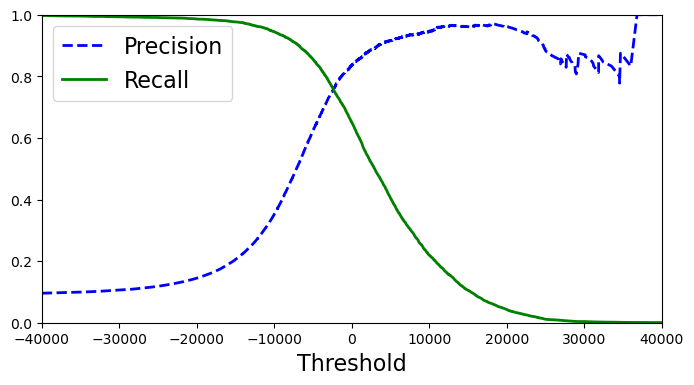

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 4))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.xlim([-40000, 40000])
plt.ylim([0, 1])
plt.show()

O que essa curva significa? Significa que podemos ter qualquer valor de precision que quisermos, mas isso mexe no recall, e vice versa! 

Por exemplo: suponha que queremos um precision de 90% - queremos que nosso classificador esteja muito seguro de que achou um dígito 5. Como já temos os valores da função de decisão (`y_scores`), basta aplicar um threshold alto para ter um classificador de alta precisão! Olhando na curva acima, vemos que um threshold de aproximadamente 8000 deve servir:

In [22]:
y_train_pred_90 = (y_scores > 8000)

Vamos medir o precision e o recall deste classificador:

In [23]:
print('Precision: {}'.format(precision_score(y_train_5, y_train_pred_90)))
print('Recall: {}'.format(recall_score(y_train_5, y_train_pred_90)))

Precision: 0.9346130773845231
Recall: 0.2874008485519277


Aumentamos o precision para aproximadamente 90%, mas o recall caiu.

Se estivermos interessados em observar apenas o compromisso entre precision e recall, podemos diagramar um contra o outro:

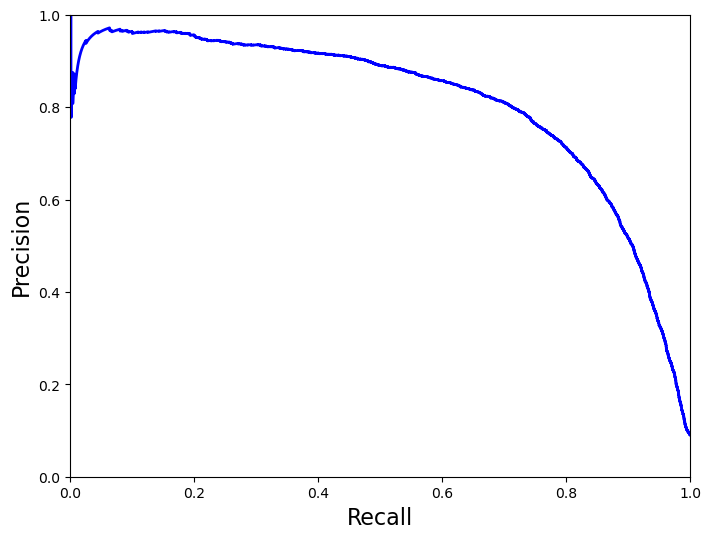

In [24]:
plt.figure(figsize=(8, 6))

plt.plot(recalls, precisions, "b-", linewidth=2)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])

plt.show()

Observe que após recall de 80% o precision cai muito rápido.

**Pergunta:** Alguem chega para você e diz "Meu classificador é o melhor! Tem precision de 99%!". O que você pergunta em seguida?

**R:**

- E qual o recall? E qual a proporção de cada classe no conjunto de treinamento e de teste?

## Sensibilidade, especificidade e curva ROC

Outra ferramenta útil para descrever o desempenho de um classificador binário é a curva de Característica de Operação do Receptor, mais conhecida pelo seu nome em inglês: *Receiver Operating Characterístic (ROC) curve*. É uma curva similar á curva precision-recall, mas usa a razão de falsos positivos (*False Positive Rate - FPR*) no eixo das abscissas, e a razão de positivos verdadeiros (*True Positive Rate - TPR*) no eixo das ordenadas. 

*True Positive Rate* é o mesmo que recall: a fração dos verdadeiros positivos que foram identificados como positivos pelo classificador. Outro nome para esta quantidade é sensibilidade (*sensitivity*). 

$$\text{TPR} = \text{recall} = \text{sensitivity} = \frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

Em termos simples, *sensitivity* é "de todos os positivos, quantos eu detectei?"

O termo sensibilidade é muito usado na Medicina, em vista da importância da sensitividade no diagnóstico médico.

**Pergunta:** No contexto de um programa de *screening* para detecção precoce do câncer de mama usando mamografias, o que significa alta sensitividade?

**R:**

Significa que casos de câncer de mama não serão ignorados.

*False Positive Rate* é a fração dos negativos verdadeiros que foram identificados como positivos pelo classificador. 

$$\text{FPR} = \frac{FP}{N} = \frac{FP}{TN + FP}$$

Para entender o FPR, vamos entender outra quantidade que é o *True Negative Rate* (TNR), também conhecida como especificidade (*specificity*). A especificidade é a fração de negativos verdadeiros que foram identificados como negativos pelo classificador.

$$\text{TPR} = \text{specificity} = \frac{TN}{N} = \frac{TN}{TN + FP}$$

Em termos simples, *specificity* é "de todos os negativos, quantos eu corretamente percebi como negativos?"

Combinando as expressões de FPR e TPR, vemos que:

$$\text{FPR} = 1 - \text{specificity}$$

**Perguntas:** 

- Na questão anterior vimos que um programa de *screening* para câncer de mama deve ter alta sensitividade, para não ignorar mulheres (apesar de que homem tem câncer de mama também!) que estejam desenvolvendo a doença. Porém, com grande sensitividade vem baixa especificidade! O que acontece se for recomendado mastectomia em todos os casos detectados pelo *screening*?

Muitas mastectomias inúteis.

- Normalmente, após uma detecção via *screening* a mulher é encaminhada para exames posteriores, incluindo biópsia. Em termos de sensibilidade e especificidade, o que esperamos de uma biópsia?

Alta sensibilidade e alta especificidade.

A curva ROC representa todos os pares (FPR, TPR) de um classificador binário que trabalhe com função de decisão.

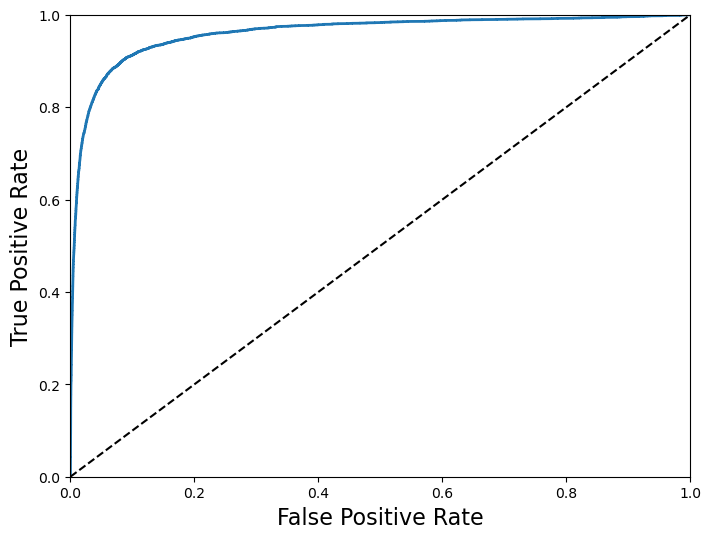

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

Quando escolhemos um valor específico de threshold para nosso classificador fixamos o ponto de trabalho deste na curva ROC. 

**Pergunta:** Um classificador perfeito opera em qual ponto do espaço $(\text{FPR}, \text{TPR})$?

**R:**

$(\text{FPR}, \text{TPR}) = (0.0, 1.0)$

O que acontece com um classificador aleatório (decide ao acaso o valor da função de decisão)? Este classificador terá uma curva ROC como a linha tracejada acima. Qualquer classificador melhor que aleatório terá uma curva ROC acima da linha tracejada.


Vamos trocar de classificador e ver o que acontece:

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# O "score" vai ser a probabilidade de que a amostra seja da classe positiva.
y_probas_forest = cross_val_predict(
    forest_clf,
    X_train,
    y_train_5,
    cv=3,
    method="predict_proba",
    n_jobs=-1,
)

# Gambiarra para desviar do bug #9589 introduzido no Scikit-Learn 0.19.0:
y_scores_forest = y_probas_forest[:, 1]

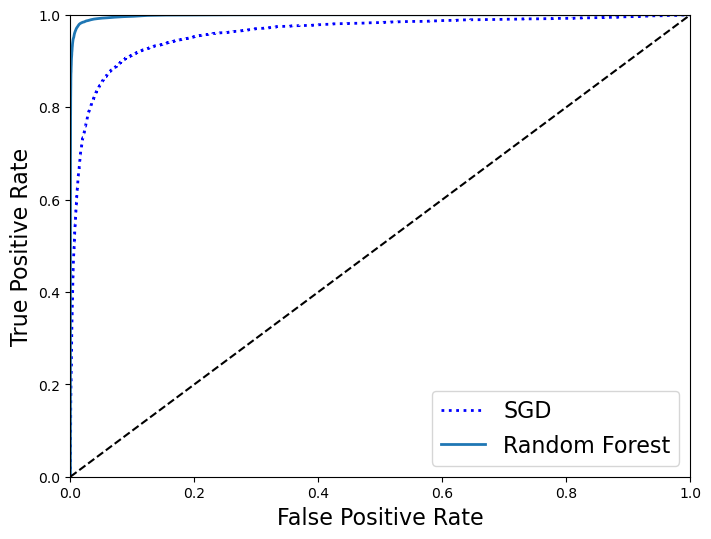

In [27]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    y_train_5,
    y_scores_forest,
)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()

Note que o classificador RandomForest apresenta TPR mais alto para um mesmo FPR do que o SGD. Com isso, parece que o RandomForest tem melhor desempenho que o SGD.

Para sumarizar o desempenho de um classificador binário em apenas um número, usamos a área sob a curva ROC (ROC AUC - Area Under the Curve - score). 

**Perguntas:** 

- Qual o valor do ROC AUC score para o classificador aleatório?

- Qual o valor do ROC AUC score para um classificador perfeito?

---

**R:**

- Qual o valor do ROC AUC score para o classificador aleatório?

0.5

- Qual o valor do ROC AUC score para um classificador perfeito?

1.0

---

**Pergunta:**

O que você prefere ter: um classificador com $AUC = 0.75$ ou com $AUC = 0.1$? Justifique.

**R**:

O classificador com $AUC = 0.1$ é preferível, desde que qualquer categorização fornecida por esse classificador seja ignorada e a classe oposta seja adotada como a classe correta. Neste caso convertemos o classificador para um novo classificador derivado, com $AUC = 0.9$

Vamos então comparar os escores ROC AUC dos dois classificadores:

In [28]:
from sklearn.metrics import roc_auc_score

print('SGD: {:4f}'.format(roc_auc_score(y_train_5, y_scores)))
print('RandomForest: {:4f}'.format(roc_auc_score(y_train_5, y_scores_forest)))

SGD: 0.960494
RandomForest: 0.998344


RandomForest é um classificador melhor do que SGD neste problema. Veja também em termos da curva precision-recall:

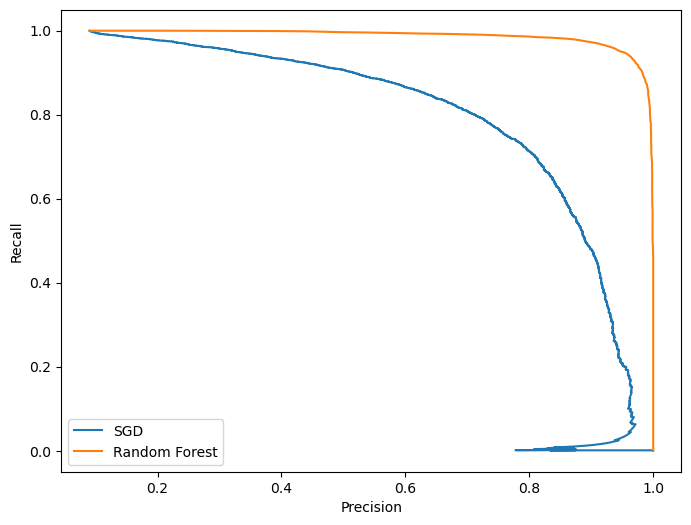

In [29]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(precisions, recalls, label='SGD')
plt.plot(precisions_forest, recalls_forest, label='Random Forest')
plt.legend(loc='lower left')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

De fato, o classificador RandomForest é superior ao classificador SGD em qualquer valor de precisão.

# Classificação multiclasse

Um classificador cinco-ou-não-cinco pode até ser útil, mas o problema real que queremos resolver é descobrir qual o dígito a partir de sua imagem. **Classificadores multiclasse** servem para este propósito.

Alguns algoritmos (como Random Forest) são intrinsecamente capazes de fazer classificação multi-classes. Outros são unicamente classificadores binários, como o SGD. 


In [30]:
forest_clf.fit(X_train, y_train)  # Aqui estamos usando y_train, não y_train_5!
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [31]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

O algoritmo RandomForest estima uma probabilidade de $90\%$ de que o dígito em questão seja um $5$, $1\%$ de que seja um $2$, $8\%$ de que seja um $3$ e $1\%$ de que seja um $9$ .

## One-versus-One e One-versus-All

Uma forma de fazer um classificador multi-classe à partir de um classificador exclusivamente binário é construir um classificador binário para cada classe, e comparar os scores resultantes de cada um. Como cada classificador é do tipo um-versus-outros, esta abordagem é conhecida como estratégia *one-versus-all* (OvA).

Outra possibilidade é treinar um conjunto de classificadores binários comparando classe-versus-classe. Por exemplo: no caso dos dígitos, teríamos o classificador zero-versus-um, zero-versus-dois, etc, até o classificador oito-versus-nove, para um total de 45 classificadores. Em geral, para um problema de $N$ classes temos $N \cdot (N - 1) / 2$ classificadores. Temos muito mais classificadores, mas cada um deles é treinado para resolver um problema muito mais específico (e.g. distinguir 5 de 7, ao invés de ter que distinguir 5 do resto). Ademais, o conjunto de treinamento de cada um destes classificadores especializados é muito menor.

Esta estratégia é conhecida como *one-versus-one* (OvO).

Quando usar qual deles (OvO versus OvA)? Alguns classificadores escalam mal com o número de amostras: nestes casos OvO é preferível. Em outros casos a simplicidade do OvA é melhor.

Scikit-learn usa automaticamente OvA para seus classificadores binários que não possam ser multiclasse automaticamente - exceto para Support Vector Machines, para os quais OvO é preferível por questão de escalabilidade.

In [32]:
sgd_clf = SGDClassifier(
    max_iter=500,
    tol=1e-3,
    random_state=RANDOM_SEED,
    n_jobs=-1,
)  # Existe aleatoriedade dentro do SGDClassifier.

sgd_clf.fit(X_train, y_train)  # Aqui estamos usando y_train, não y_train_5!
sgd_clf.predict([some_digit])

array([3], dtype=int8)

Para confirmar esse resultado, observe os valores da função de decisão para cada uma das classes:

In [33]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(sgd_clf.classes_)
print(some_digit_scores)

[0 1 2 3 4 5 6 7 8 9]
[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


Observe que o maior score corresponde à classe $5$ realmente.

**ATENÇÃO**: neste exercício temos uma coincidência: 

- A classe $0$ corresponde ao índice 0 no vetor de classes.
- A classe $1$ corresponde ao índice 1 no vetor de classes.
- ... e assim por diante.

Trata-se de uma coincidência! Se as classes fossem "cadeira", "mesa" e "chapeu" essa coincidência não existiria.

Se você tem um classificador binário qualquer (você fez o seu próprio classificador, por exemplo) e quer usá-lo em classificação multiclasse, o scikit-learn já tem classes auxiliares para transformar seu classificador binário em OvO ou OvA:

In [34]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(
    SGDClassifier(
        max_iter=5,
        tol=-np.infty,
        random_state=RANDOM_SEED,
    ))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [35]:
len(ovo_clf.estimators_)

45

## Métricas de desempenho

Assim como no caso dos classificadores binários, estamos interessados em estimar a performance real dos nossos classificadores multiclasse:

In [36]:
cross_val_score(
    sgd_clf,
    X_train,
    y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
)

array([0.87365, 0.85835, 0.8689 ])

Nada mal: um classificador aleatório teria apenas um desempenho médio de 10% de acurácia!

Podemos melhorar o desempenho do classificador usando todos os truques das aulas passadas (GridSearch, scaling, data augmentation, etc). Por exemplo:

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(
    sgd_clf,
    X_train_scaled,
    y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
)

array([0.9036 , 0.90085, 0.9083 ])

## Análise de erro

Bom, você já usou todos os truques básicos do nosso arsenal, e agora tem um modelo que é o melhor que você conseguiu até o momento. Para avançar mais, temos que mergulhar mais a fundo na análise dos erros que nosso classificador está fazendo.

Uma primeira abordagem para a análise fina dos erros é a matriz de confusão:

In [38]:
y_train_pred = cross_val_predict(
    sgd_clf,
    X_train_scaled,
    y_train,
    cv=3,
    n_jobs=-1,
)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5612,    0,   25,    7,    9,   53,   39,    6,  171,    1],
       [   1, 6421,   40,   28,    5,   46,    4,    8,  174,   15],
       [  27,   28, 5275,   97,   74,   32,   69,   40,  304,   12],
       [  27,   21,  122, 5285,    2,  219,   27,   42,  308,   78],
       [  12,   15,   51,   12, 5245,   12,   42,   28,  236,  189],
       [  32,   17,   35,  180,   53, 4544,   78,   17,  393,   72],
       [  32,   16,   47,    2,   44,   99, 5572,    3,  102,    1],
       [  21,   12,   56,   35,   51,   12,    3, 5713,  119,  243],
       [  21,   68,   46,   95,    4,  130,   32,   11, 5385,   59],
       [  27,   20,   31,   71,  125,   41,    1,  181,  249, 5203]],
      dtype=int64)

Uma visualização gráfica pode ser mais efetiva:

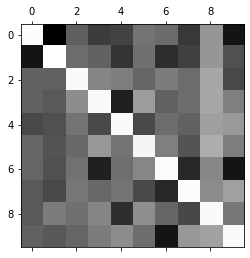

In [39]:
plt.matshow(np.log(1 + conf_mx), cmap=plt.cm.gray)
plt.show()

Como esperado, a maior parte das predições é correta, e portanto a diagonal da matriz de confusão se sobressai. Para ressaltar os erros, vamos fazer o seguinte:

- Normalizar as linhas pela soma dos valores da linha.
- Zerar os elementos da diagonal, para facilitar a visualização dos erros.

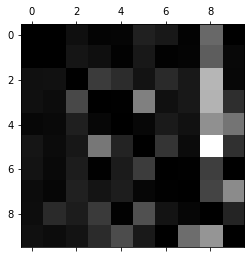

In [40]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(np.log(1 + norm_conf_mx), cmap=plt.cm.gray)
plt.show()

Agora está mais claro: parece que temos muitos $5$ que são classificados como $3$ e vice-versa! Temos também vários $5$ classificados como $8$, mas o reverso é menos presente.

Pode ser ilustrativo observar alguns exemplos específicos de erro:

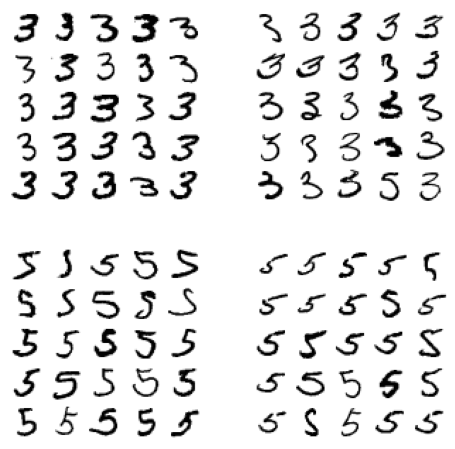

In [41]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Alguns erros são compreensíveis (digitos que de fato se parecem tanto com 3 como com 5), outros exemplos são misteriosos, como alguns digitos que são claramente 5 e foram classificados como 3. Por que um dígito que tão claramente se parece com um 5 foi classificado como 3? 

A resposta está no tipo de classificador usado. O SGDClassifier é um modelo linear: uma mera ponderação linear dos valores dos píxels. Se dois dígitos diferem apenas por poucos pixels, é fácil confundí-los.

**Atividade**: Agora que você tem um modelo treinado, avalie a acurária do modelo no conjunto de teste.

**Atividades:** Faça os problemas 1 e 2 do capítulo 3 do livro texto (Géron).

**Desafio:** Problema 4 do livro texto (Géron)!